In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import plotly.express as px
import seaborn as sns

# Execute the code below

In [38]:
import pandas as pd
import numpy as np
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


# Merge
First of all, you have to merge both DataFrames to have a new DataFrame "df2018" DataFrame with 365 rows and 20 columns (indeed, you can drop the date column in double).



In [73]:
# Your code here :
df2018 = pd.merge(df_main ,
                  df_opinion, 
                  how="left", 
                  left_on='DATE',
                  right_on='date')
df2018.drop('date',             
            axis = 1,           
            inplace = True) 
df2018

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,bad
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,bad
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,bad
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,30.750,8,6,3,119.0,0.0,1.0,8.7,very bad
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4,113.0,0.0,1.0,8.7,very bad
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,33.000,8,5,1,116.0,0.0,1.0,8.7,very bad
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,1038,70.375,10,9,7,143.0,0.0,1.0,3.3,very bad


# Linear regresssion
There are some missing values in the "Sunhour" column, and you want to fill them.

First, you have to split the DataFrame to have :
- a DF with only rows without NaN, you'll call it "df_clean". This DF should have 341 rows and 20 columns.
- a DF with only rows with NaN in the Sunhour column (The rows you want to fill), you'll call it "df_nan". This DF should have 24 rows and 20 columns.


In [74]:
# Your code here :
df_clean = df2018.dropna()
df_clean.shape


(341, 20)

In [95]:
df_nan = df2018[df2018['SUNHOUR'].isna()]
df_nan.shape

(24, 20)

## Now, train your model
For this part, let's work on df_clean. 
With scikit-learn, find the multivariate linear regression model with the best score (remember to train-test-split your DataFrame "df_clean" before!). 

You are trying to predict `SUNHOUR`, so what's your target `y` ?

Print the R2-score for the test set, and check if you don't have underfitting or overfitting.

In [63]:
# Test avec toutes les variables
X = df_clean[['MIN_TEMPERATURE_C', 'MAX_TEMPERATURE_C', 'WINDSPEED_MAX_KMH', 	'TEMPERATURE_MORNING_C',	'TEMPERATURE_NOON_C', 	
              'TEMPERATURE_EVENING_C', 	'PRECIP_TOTAL_DAY_MM', 	'HUMIDITY_MAX_PERCENT', 	'VISIBILITY_AVG_KM', 	'PRESSURE_MAX_MB',
              'CLOUDCOVER_AVG_PERCENT', 	'HEATINDEX_MAX_C', 	'DEWPOINT_MAX_C',	'WINDTEMP_MAX_C', 'WEATHER_CODE_EVENING', 	
              'TOTAL_SNOW_MM', 	'UV_INDEX']]
y = df_clean['SUNHOUR']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)
modelLR = LinearRegression().fit(X_train,y_train)

print("\nScore for the Train dataset :", modelLR.score(X_train, y_train))
print("Score for the Test dataset :", modelLR.score(X_test, y_test))


Score for the Train dataset : 0.7491968684616793
Score for the Test dataset : 0.6834247267984632


In [84]:
# après plusieurs tests voici le meilleur résultat obtenu
X = df_clean[['MIN_TEMPERATURE_C', 'MAX_TEMPERATURE_C', 'WINDSPEED_MAX_KMH', 	'TEMPERATURE_MORNING_C',	'TEMPERATURE_NOON_C', 	
              'TEMPERATURE_EVENING_C', 	 	'HUMIDITY_MAX_PERCENT', 	'VISIBILITY_AVG_KM', 	'PRESSURE_MAX_MB', 	'CLOUDCOVER_AVG_PERCENT', 	
              'DEWPOINT_MAX_C',	'WINDTEMP_MAX_C']]
y = df_clean['SUNHOUR']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)
modelLR = LinearRegression().fit(X_train,y_train)

print("\nScore for the Train dataset :", modelLR.score(X_train, y_train))
print("Score for the Test dataset :", modelLR.score(X_test, y_test))


Score for the Train dataset : 0.7429388004487967
Score for the Test dataset : 0.7047181217352408


## Predictions
Predict the sunhours values for your DF "df_nan", and store result in the `SUNHOUR` column (which is empty, because this is `df_nan`).

In [98]:
# Your code here :
df_nan['SUNHOUR'] = modelLR.predict(df_nan[['MIN_TEMPERATURE_C', 'MAX_TEMPERATURE_C', 'WINDSPEED_MAX_KMH', 	'TEMPERATURE_MORNING_C',	'TEMPERATURE_NOON_C', 	
                                                'TEMPERATURE_EVENING_C', 	 	'HUMIDITY_MAX_PERCENT', 	'VISIBILITY_AVG_KM', 	'PRESSURE_MAX_MB', 	'CLOUDCOVER_AVG_PERCENT', 
                                                'DEWPOINT_MAX_C',	'WINDTEMP_MAX_C']])
df_nan.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
18,2018-01-19,10,6,23,6,10,6,0.7,88,9.875,1020,37.000,10,6,5,NaN,NaN,NaN,7.336044,NaN
31,2018-02-01,8,3,17,4,8,4,0.2,81,10.000,1012,39.500,8,3,2,NaN,NaN,NaN,8.060883,NaN
66,2018-03-08,13,7,23,7,12,9,0.4,87,9.750,1005,52.625,13,7,6,NaN,NaN,NaN,7.431536,NaN
100,2018-04-11,15,7,14,7,15,12,1.2,87,7.875,1002,59.125,15,10,10,NaN,NaN,NaN,9.614313,NaN
118,2018-04-29,10,7,23,8,10,8,0.7,93,9.000,1008,85.000,10,9,7,NaN,NaN,NaN,6.090703,NaN


## Concatenate and scatterplot

Concatenate both DataFrames to a new one "df2018complete", and draw a scatterplot with Date on X-axis and Sunhours on Y-axis.
Try to add a flag to identify real values and predicted values. 

You should get something like that. Of course, not exactly the same chart, because we don't train the same model, on the same columns, etc...

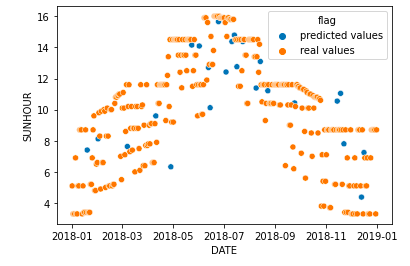

In [100]:
# Your code here
df_clean['flag'] = "real values"
df_nan['flag'] = "predicted values"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [101]:
df2018complete = pd.concat([df_clean , df_nan], ignore_index=True)
df2018complete['DATE'] = pd.to_datetime(df2018complete['DATE'])
df2018complete

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.100000,bad,real values
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.300000,bad,real values
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.300000,bad,real values
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.300000,bad,real values
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.900000,bad,real values
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-11-14,15,7,16,7,15,12,0.0,83,9.000,1027,22.000,16,13,8,NaN,NaN,NaN,10.428238,NaN,predicted values
361,2018-11-18,9,4,27,4,9,6,0.0,77,10.000,1018,0.375,9,3,1,NaN,NaN,NaN,10.925750,NaN,predicted values
362,2018-11-22,12,2,16,3,10,8,0.8,90,9.625,1014,44.500,12,8,2,NaN,NaN,NaN,7.771190,NaN,predicted values
363,2018-12-13,3,2,23,3,3,2,1.4,86,8.875,1014,88.875,3,1,-3,NaN,NaN,NaN,4.241546,NaN,predicted values


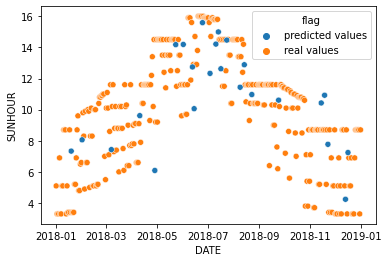

In [105]:
sns.scatterplot(data = df2018complete, x = 'DATE', y ='SUNHOUR', hue = 'flag', hue_order=['predicted values', 'real values'])